# CQF Exam 3

## January 2024 Cohort

## Task 1

What is the cost function of Logistic Regression? Explain in Detail.

### Answer:
This follows mostly [1] (p. 7-10, 25-26) and [2].

Logistic regression is one of the most used machine learning methods for classification mapping qualitative data onto categorical variables, e.g. either 0 or 1. The cost function derived for logistic regression is the so-called Binary Cross Entropy cost function and can be derived as follows:

***1. Logistic probability predictor via logit function***

To model the probability $p$ of the classification mapping to 1, we can invert the logit function that converts log-odds to probabilities $$logit(p) = \log\left(\frac{p}{1 - p}\right)=z,$$ solving for $$p=\frac{1}{1 + e^{-z}}=:\sigma(z).$$ This so-called sigmoid function can be used to model probabilities as it yields values between 0 and 1, as can seen per plot below:

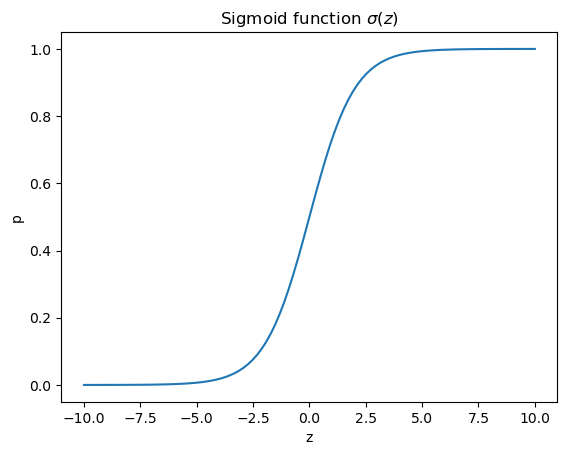

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
p = sigmoid(z)

plt.figure()
plt.plot(z, p)
plt.title('Sigmoid function $\sigma(z)$')
plt.xlabel('z')
plt.ylabel('p')
plt.show()

Now, the predictor function for a training data point $(x,y)$ is given by the sigmoid function applied to the linear combination of input features:
$$\hat{y}=P(Y=1|X=x) = \sigma(\mathbf{w}\cdot\mathbf{x}).$$

***2. Probability of the output $y$***

For a given input $x$ and its corresponding label $y$:
$$P(Y=y|X=x)=
\begin{cases}
\hat{y} = \sigma(\mathbf{w}\cdot\mathbf{x}) & \text{if } y=1\\
1-\hat{y} = 1-\sigma(\mathbf{w}\cdot\mathbf{x}) & \text{if } y=0.
\end{cases}$$

***3. Bernoulli distribution***

If $y$ can either take values 0 or 1, then $Y \sim \text{Ber}(p)$ follows a Bernoulli distribution with $p = \sigma(\mathbf{w} \cdot \mathbf{x})$. Hence:
\begin{align*}
P(Y=y|X=x) &=p^y \cdot (1-p)^{(1-y)}\\
&=\sigma(\mathbf{w}\cdot\mathbf{x})^y \cdot \left(1-\sigma(\mathbf{w}\cdot\mathbf{x})\right)^{(1-y)}\\
&=\hat{y}^y \cdot \left(1-\hat{y}\right)^{(1-y)}
\end{align*}

***4. Log-likelihood***

Taking the natural logarithm of the probability of the above and applying logarithm laws yields
$$\log P(Y=y|X=x) = y\log(\hat{y}) + (1-y)\log(1-\hat{y}).$$

***5. Cost function for one training data point $(x,y)$***

To convert this problem into a minimization problem, we consider the negative of the log-likelihood. For a single training example $(x,y)$, we obtain the cost function:
$$L(\hat{y}, y) = -\log P(y|x) = -\left(y\log(\hat{y}) + (1-y)\log(1-\hat{y})\right)$$

***6. Cost function for the entire dataset***

To get the cost function for the entire training dataset, we sum over all training examples and take the average. If we have $n$ training examples, the cost function called the *Binary Cross Entropy function* is then obtained as
\begin{align*}
J(\mathbf{w}) &= -\frac{1}{n}\sum_{i=1}^{n} \left( y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)})\right)\\
 &= -\frac{1}{n}\sum_{i=1}^{n} \left( y^{(i)}\log(\sigma(\mathbf{w}\cdot x^{(i)})) + (1-y^{(i)})\log(1-\sigma(\mathbf{w}\cdot x^{(i)}))\right)\\
 &= -\frac{1}{n}\sum_{i=1}^{n} \left( y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})\right)
\end{align*}

This cost function is minimized to train the logistic regression model, leading to optimal parameters $\mathbf{w}$ that best fit the training data. Since the function is convex, we can use gradient descent to find the global minimum.

## Task 2

What are voting classifers in ensemble learning?

### Answer:
This follows mostly [3] and [4].

Ensemble models are machine learning models that combine multiple individual predictors to arrive at a prediction. A group of predictors forms an ensemble. The idea is that the collective of multiple models often produces better results than a single model in both efficiency and accuracy. To combine the various classifiers into a final predictor, there are different voting classifiers, such as:

**1. Arithmetic averaging**: Each individual model makes a prediction. The final prediction determined by taking the arithmetic average over all individual predictions. This voting style is used in Bagging algorithms like Random Forests which use Decision Trees and can help to reduce variance (help with overfitting).

As a prominent example, the final estimator to a regression problem employing Random Forests sampled into $M$ data sets from the original data set $\mathcal{D}: \mathcal{D}_1,...,\mathcal{D}_M$ trained to maximum depth $f(x,\mathcal{D}_i)$ is given by
$$\hat{f}(x) = \frac{1}{M}\sum_{i=1}^{M}f(x;\mathcal{D}_i).$$

**2. Weighted vote classifiers**: This approach is often used in Boosting algorithms with base models that are weak learning algorithms, i.e. only *slightly* better than chance (e.g. decision tree with low depth and high bias). Boosting algorithms are addititive models which are sequentially trained on smaller structures. Each model aims to correct the errors of its predecessor by adjusting weights used in the weighted average, while the metric to measure (and therefore correct) the error of the predecessor model may vary depending on loss function. Such Boosting algorithms like AdaBoost or Gradient Boosting can help to reduce bias.

As a prominent example, the final estimator to a classification problem with $(x_i,y_i)\in(X,\pm 1)$ of AdaBoost sampled over $M$ weak learners $G_m(x_i)$ is given by the weighted sum
$$\hat{G}(x) = \text{sign}\left(\sum_{m=1}^{M} \alpha_m G_m(x)\right).$$
The weights $\alpha_m = \ln\left(\frac{1 - e_m}{e_m}\right)$ will focus more on weak learners with high errors $$e_m = \frac{\sum_{i=1}^{N} w_i \mathbb{1}_{y_i\neq G(x_i)}}{\sum_{i=1}^{N} w_i}$$
in an attempt to improve the weakest weak learners. The data points $(x_i,y_i)$ are then re-weighted to finally obtain the final ensemble prediction.

**3. Hard voting**: This is a majority voting classifier where the final predictor will be determined by choosing the prediction with the most votes among the individual models. It is often used in classification algorithms, according to Dr. Panos Parpas' lecture, this is e.g. used in Bagging algorithms tailored for classification rather than regression problems. In this method, each model casts a vote for a class, and the class with the most votes is chosen as the final prediction.

**4. Soft Voting**: Unlike hard voting which counts the votes of each classifier in the ensemble and selects the class with the most votes, soft voting calculates the average predicted probabilities of each class for all classifiers and selects the class with the highest average probability. This can provide a more accurate prediction because soft voting also considers the confidence of each model.

## Task 3: Short-term asset return prediction

Follow the 7-steps to model building for your selected ticker,

* (a) produce a model to predict positive moves (up trend) using Support Vector Machine (SVM) model.
* (b) tune hyperparameters for the estimator and present the best model.
* (c) investigate the prediction quality using area under ROC curve, confusion matrix and classification report.

### Answer:
The 7 steps to model building are explained in [5] as follows:

1. Understand the problem
2. Collect data
3. Explore data (visualization)
4. Clean data (pre-process)
5. Transform data (normalization)
6. Select the appropriate model + train
7. Validate the model

We shall now implement these on the asset price of Tesla (ticker: TSLA) following mostly the approach from Python Labs [2] with some adjustments.

We will perform all 7 steps of the model building theory 

In [9]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import yfinance as yf
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFECV
from sklearn.metrics import (accuracy_score, classification_report,
                             log_loss, ConfusionMatrixDisplay, RocCurveDisplay)
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor

### ---------- Data Collection + Initial Data Analysis / Visualizations ----------

In [10]:
ticker = "TSLA"  # specify ticker

In [11]:
df = yf.download(ticker, start="2018-01-01")
df['Return'] = df['Close'].pct_change()
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,NaN
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,-0.010233
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,-0.008290
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,0.006230
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,0.062638


In [12]:
# Get Info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1611 entries, 2018-01-02 to 2024-05-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1611 non-null   float64
 1   High       1611 non-null   float64
 2   Low        1611 non-null   float64
 3   Close      1611 non-null   float64
 4   Adj Close  1611 non-null   float64
 5   Volume     1611 non-null   int64  
 6   Return     1610 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 100.7 KB


In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,NaN
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,-0.010233
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,-0.008290
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,0.006230
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,0.062638


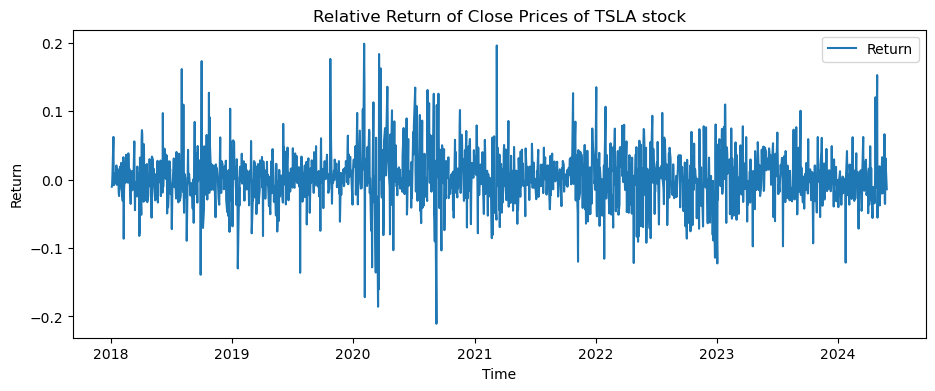

In [14]:
# Visualize the return data
plt.figure(figsize=(11, 4))
plt.plot(df['Return'], label='Return')
plt.title(f'Relative Return of Close Prices of {ticker} stock')
plt.xlabel('Time')
plt.ylabel('Return')
plt.legend()
plt.show()

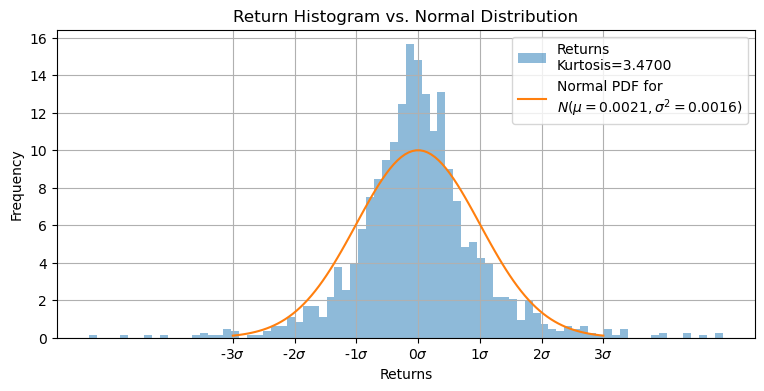

In [15]:
# Compare to normal distribution
mu = df['Return'].mean()
sigma = df['Return'].std()
kurtosis = stats.kurtosis(df['Return'].dropna())
plt.figure(figsize=(9, 4))
plt.hist(df['Return'], density=True, bins=80, label=f"Returns\nKurtosis={kurtosis:.4f}", alpha=0.5)

# following 68–95–99.7 rule, 3 stdevs from mean contain 99.7% of normally distributed values
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm(mu, sigma).pdf(x), label=f"Normal PDF for\n$N(\mu=${mu:.4f}$, \sigma^2=${sigma**2:.4f})")

plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title("Return Histogram vs. Normal Distribution")
plt.legend()

xticks = np.linspace(mu - 3*sigma, mu + 3*sigma, 7)
plt.xticks(xticks, labels=[f"{i}$\sigma$" for i in range(-3, 4)])
plt.grid()
plt.show()

Our plot shows a pattern often observed for financial returns (also explained in e.g. [7]): The returns of our considered asset are not normally distributed with kurtosis $>3$, implying higher peaks and fatter tails than normal distribution.

In [16]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1611.0,1.485433e+02,1.105639e+02,1.207333e+01,2.263067e+01,1.725500e+02,2.386633e+02,4.114700e+02
High,1611.0,1.518373e+02,1.129517e+02,1.244533e+01,2.313233e+01,1.754000e+02,2.437283e+02,4.144967e+02
Low,1611.0,1.449931e+02,1.078843e+02,1.179933e+01,2.222700e+01,1.677900e+02,2.339850e+02,4.056667e+02
Close,1611.0,1.484911e+02,1.104296e+02,1.193133e+01,2.258067e+01,1.720800e+02,2.386550e+02,4.099700e+02
Adj Close,1611.0,1.484911e+02,1.104296e+02,1.193133e+01,2.258067e+01,1.720800e+02,2.386550e+02,4.099700e+02
Volume,1611.0,1.311440e+08,8.164090e+07,2.940180e+07,8.134200e+07,1.073432e+08,1.506976e+08,9.140820e+08
Return,1610.0,2.105599e-03,3.988217e-02,-2.106282e-01,-1.912948e-02,1.535058e-03,2.063046e-02,1.989486e-01


Check if original data needs cleaning + clean appropriately

In [17]:
 # Check for missing values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       1
dtype: int64

Clean the data + remove NaN value from "Return" column:

In [18]:
df = df.dropna()  # drop NaN values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       0
dtype: int64

### ---------- Feature Engineering ----------

Features are independent variables which are used to determine the value of the target variable. We will generate a set of features from the downloaded dataset according to the definition from the exam paper.

In [19]:
def get_features(df):
    df['O-C'] = df['Open'] - df['Close']
    df['H-L'] = df['High'] - df['Low']
    df['Sign'] = np.sign(np.log(df['Close'] / df['Close'].shift(1)))

    for lag in [1, 3, 5, 10, 21]:
        df[f'Past Return_{lag}'] = df['Return'].shift(lag)

    for momentum_period in [1, 3, 5, 10, 21]:
        df[f'Momentum_{momentum_period}'] = df['Close'] - df['Close'].shift(momentum_period)

    for sma_period in [1, 3, 5, 10, 21]:
        df[f'SMA_{sma_period}'] = df['Close'].rolling(window=sma_period).mean()

    for ema_period in [1, 3, 5, 10, 21]:
        df[f'EMA_{ema_period}'] = df['Close'].ewm(span=ema_period, adjust=False).mean()

    df.dropna(inplace=True)
    features = df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
    return features


features = get_features(df)
features.head()

,Adj Close,Return,O-C,H-L,Sign,Past Return_1,Past Return_3,Past Return_5,Past Return_10,Past Return_21,...,SMA_1,SMA_3,SMA_5,SMA_10,SMA_21,EMA_1,EMA_3,EMA_5,EMA_10,EMA_21
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-02,22.916668,-0.015748,0.312666,0.762667,-1.0,-0.014281,-0.010614,0.015431,0.015817,-0.010233,...,22.916668,23.273556,23.235467,23.155933,22.747524,22.916668,23.115321,23.142489,23.071941,22.733514
2018-02-05,22.208668,-0.030895,0.322666,0.764666,-1.0,-0.015748,0.024550,0.019484,0.004400,-0.008290,...,22.208668,22.802890,23.016800,23.033067,22.806286,22.208668,22.661994,22.831215,22.914982,22.685801
2018-02-06,22.264668,0.002522,-0.584000,0.848000,1.0,-0.030895,-0.014281,-0.010614,0.003499,0.006230,...,22.264668,22.463334,22.858801,22.907600,22.861492,22.264668,22.463331,22.642366,22.796743,22.647516
2018-02-07,23.000000,0.033027,-0.400667,0.689335,1.0,0.002522,-0.015748,0.024550,-0.019558,0.062638,...,23.000000,22.491112,22.734667,22.901667,22.888762,23.000000,22.731665,22.761577,22.833699,22.679560
2018-02-08,21.015333,-0.086290,1.872000,2.268000,-1.0,0.033027,-0.030895,-0.014281,-0.023852,-0.008085,...,21.015333,22.093334,22.281067,22.752267,22.830159,21.015333,21.873499,22.179496,22.503087,22.528267


### ---------- Label Specification ----------

For general trend analysis, we would like to include slight drops of up to 0.25% in the closing price of TSLA still part of the positive class (1), so we design our target variable as follows:

In [20]:
def get_target(df):
    # for trend prediction, contain days with small decrease (< 0.25%) in asset close price also within positive class
    return np.where(df['Close'].shift(-1) > 0.9975 * df['Close'], 1, 0)

In [21]:
X = features
y = get_target(df)

# Check Class Imbalance
pd.Series(y).value_counts()

1    882
0    707
Name: count, dtype: int64

We observe that the number of days where the TSLA closed positively w.r.t. our definition (i.e. at least at 99.75% of the previous day's closing price; class variable 1) are higher than the number of days where the index closed negatively (class variable 0).

Also note that this target specification makes our problem a typical **classification** problem.

### ---------- Split Data: Testing vs. Training Data ----------

Before we dive deeper into feature selection, we want to split our data into testing and training data.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### ---------- Feature Selection ----------

This follows mostly [6], Exercise 1 that discussed various feature selection methods. We currently have quite many suggested features which might make the model less accuracte and more performant.

Current number of features:

In [23]:
len(features.columns)

25

Let us first look at the so-called `SelectKBest` method, a frequently applied feature selection algorithm that selects the top $k$ features with the highest scores based on statistical testing. In our case, we use the `f_classif` test based on the ANOVA F-value test and select the $k=16$ best features (`f_classif` is the default implementation of `SelectKBest` according to [8]).

Since we start with 25 features and I do not want to limit the model too quickly (we will later combine other selection methods to narrow the feature number down), let us look at the 16 best features (opposed to the default implementation of `SelectKBest` narrowing down to the 10 best features).

In [24]:
def select_k_best(X_train, X_test, y_train, k=10):
    selector = SelectKBest(f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    selected_features = X_train.columns[selector.get_support()]
    return selected_features, X_train_selected, X_test_selected


selected_features_kbest, X_train_kbest, X_test_kbest = select_k_best(X_train, X_test, y_train, k=16)

print("SelectKBest selected features:\n", selected_features_kbest)

SelectKBest selected features:
 Index(['Past Return_1', 'Past Return_3', 'Past Return_5', 'Past Return_21',
       'Momentum_10', 'Momentum_21', 'SMA_1', 'SMA_3', 'SMA_5', 'SMA_10',
       'SMA_21', 'EMA_1', 'EMA_3', 'EMA_5', 'EMA_10', 'EMA_21'],
      dtype='object')


Next, we attempt to further refine our feature selection by employing a recursive feature elimination with cross-validation `RFECV`. Recursive feature elimination means that this selector iteratively removes the least important feature according to an importance ranking. Moreover, cross-validation is applied to ensure the selected features behave well with respect to test data. This can help with overfitting.

Unlike the exercise sheets [6], we will use `RandomForestClassifier()` instead of `LinearRegression()` for our model within the RFECV framework since our analysis revolves around a binary classification problem. (Remark: I tried using different classifiers including `LogisticClassifier()` and `RandomForestClassifier()` with various hyper-parameters and my solution below yielded the best overall results.) `RandomForestClassifier()` [9] employs random forests fitting a number of decision trees on different subsets of the training data. It is an ensemble method. The interplay of ensemble learning and decision trees can improve the accuracy of the model and reduce its variance.

In [25]:
def rfecv_method(X_train, X_test, y_train, step=0.1, n_estimators=100, display_dataframe=0):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rfecv = RFECV(estimator=model, step=step, cv=5, scoring="accuracy")
    rfecv.fit(X_train, y_train)
    X_train_selected = rfecv.transform(X_train)
    X_test_selected = rfecv.transform(X_test)
    selected_features = X_train.columns[rfecv.get_support()]
    if display_dataframe:
        rankings_df = pd.DataFrame({'Feature': X_train.columns,
                                    'Ranking': rfecv.ranking_})
        print(rankings_df.sort_values(by="Ranking"))
    return X_train_selected, X_test_selected, selected_features


X_train_rfecv, X_test_rfecv, selected_features_rfecv = rfecv_method(
    pd.DataFrame(X_train_kbest, columns=selected_features_kbest),
    pd.DataFrame(X_test_kbest, columns=selected_features_kbest), y_train, display_dataframe=1)

print("")
print("RFECV selected features:", selected_features_rfecv)

           Feature  Ranking
0    Past Return_1        1
1    Past Return_3        1
2    Past Return_5        1
4      Momentum_10        1
5      Momentum_21        1
9           SMA_10        1
3   Past Return_21        2
7            SMA_3        3
10          SMA_21        4
11           EMA_1        5
15          EMA_21        6
14          EMA_10        7
6            SMA_1        8
12           EMA_3        9
8            SMA_5       10
13           EMA_5       11

RFECV selected features: Index(['Past Return_1', 'Past Return_3', 'Past Return_5', 'Momentum_10',
       'Momentum_21', 'SMA_10'],
      dtype='object')


The ranking table above shows which features where removed first (at the bottom of the dataframe). The ones with ranking 1 on top are being kept.

Let us now analyze multicollinearity would lead to redundancy in our trend analysis among the remaining features. A way to check for correlation between features is to use the correlation matrix computing the Pearson correlation $$\rho_{ij} = \frac{\text{cov}(X_i, X_j)}{\sigma_{X_i} \sigma_{X_j}}$$ pairwisely between feature $X_i$ and feature $X_j$. High correlation or high anti-correlation are indicators to discard one of both correlated features.

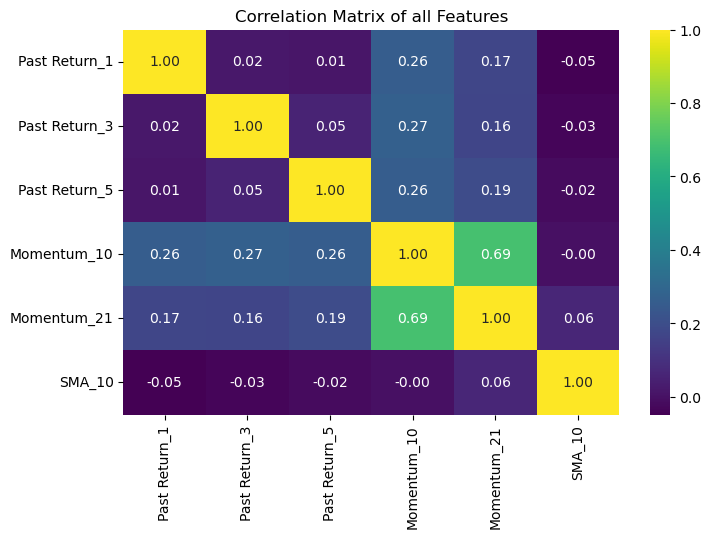

In [28]:
corr_matrix = pd.DataFrame(X_train_rfecv, columns=selected_features_rfecv).corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap="viridis")
plt.title("Correlation Matrix of all Features")
plt.show()

The only higher correlation visible is $Corr(\text{Momentum_10}, \text{Momentum_21} = 69\%$

This is an indicator that we could potentially drop one feature or the other to reduce linear dependency among features. Since the correlation is still not alarmingly high, we choose drop no features at this point and first perform another analysis.

In [37]:
# print("Momentum_10: ", round(sum(abs(corr_matrix['Momentum_10'])), 4))
# print("Momentum_21: ", round(sum(abs(corr_matrix['Momentum_21'])), 4))

In [38]:
X_train_corr = pd.DataFrame(X_train_rfecv, columns=selected_features_rfecv)
X_test_corr = pd.DataFrame(X_test_rfecv, columns=selected_features_rfecv)
selected_features_corr = selected_features_rfecv

To further improve the significance of the chosen features, we will conduct a Variance Inflation Factor (VIF) analysis for each feature, calculating its $$\text{VIF}_i =\frac{1}{1-R_i^2},$$ where $R_i^2$ determines how well feature $i$ is being regressed against by all other features. The feature is more correlated with the other features, the higher the value of $R_i^2$ is. According to [6], a VIF-value exceeding 5 indicates high multicollinearity.

In [39]:
def variance_inflation_factor_analysis(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data


vif_data = variance_inflation_factor_analysis(pd.DataFrame(X_train_corr,
                                                           columns=selected_features_corr))
vif_data.round(2).sort_values(by="VIF", ascending=False)

,feature,VIF
3,Momentum_10,2.18
4,Momentum_21,1.94
0,Past Return_1,1.08
1,Past Return_3,1.08
2,Past Return_5,1.08
5,SMA_10,1.01


The features are not majorly correlated anymore and seem an appropriate selection to continue.

In [40]:
X_train_selected = pd.DataFrame(X_train_corr, columns=selected_features_corr)
X_test_selected = pd.DataFrame(X_test_corr, columns=selected_features_corr)
selected_features = selected_features_corr

### ---------- Base Model ----------

We will use Pipelines and some default parameters to build a base model now using SVC method, explained in Paul's introductory lectures [10]. For Python help, I also consulted the official `scikit-learn` documentation [11].

In [41]:
# Define a baseline model to benchmark against
base_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel="rbf", C=1.0, gamma=0.1, random_state=42))
])
base_model.fit(X_train_selected, y_train)

print(base_model.classes_)  # verify class labels

[0 1]


In [42]:
# Predict on the test data
y_pred = base_model.predict(X_test_selected)
y_pred[-20:]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
# Evaluate the model for both test + training data
accuracy_train = accuracy_score(y_train, base_model.predict(X_train_selected))
accuarcy_test = accuracy_score(y_test, y_pred)
print(f"Baseline Model:\nTrain Accuracy: {accuracy_train:0.4}, Test Accuracy: {accuarcy_test:0.4}")

Baseline Model:
Train Accuracy: 0.5956, Test Accuracy: 0.5629


The accuracy score of our baseline model is sufficient for a start. We probably have overfit our model slightly since the test accuracy at 56.29% is lower than the train accuracy at 59.56%. We will try to play around with the hyper-parameters in the following to improve the model accuracy.

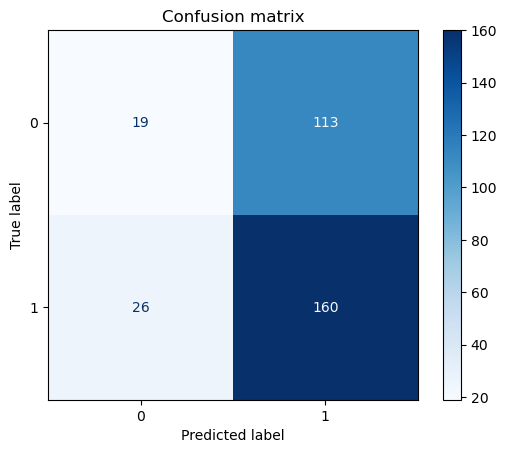

In [45]:
# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(base_model, X_test_selected, y_test, cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.show()

The confusion matrix implies that our baseline model is better than chance (a 50:50 random guessing approach) at determining class label 1, but still has quite many false negatives (predicting 1 when actual label of 0 is actually known). It performs poorly at identifying class label 0 - identifying more wrongly as a 0 than correctly. This also indicates some class imbalance which we will try to correct with some class weights in the hyper-parameter tuning round.

The mediocre performance overall can also be seen from the ROC curve below:

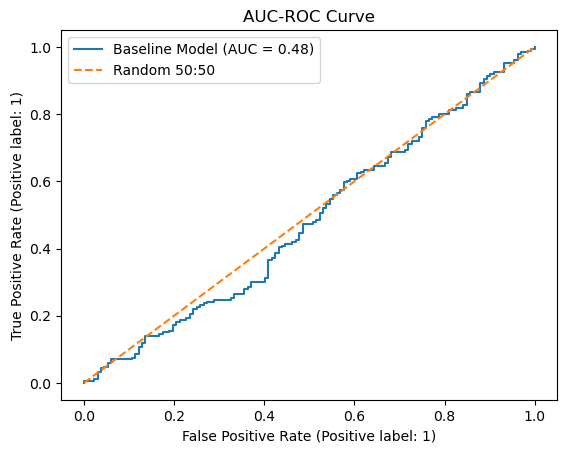

In [47]:
# Display ROC Curve
RocCurveDisplay.from_estimator(base_model, X_test_selected, y_test, name="Baseline Model")
plt.title("AUC-ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random 50:50")
plt.legend()
plt.show()

### ---------- Hyperparameter Tuning ----------

Our initial model was not very accurate overall. We will try to tune our hyper-parameters, especially the values for  to improve our model. Since we suspect some class imbalance in our data, we will in particular also integrate class weights (weights for the classes 0 and 1), to give more weight to the minority class 0.

The following part follows again [2] and utilizes `optuna` library for hyper-parameter optimization.

We first take a look at all the model's parameters:

In [114]:
base_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier', SVC(gamma=0.1, random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': SVC(gamma=0.1, random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__C': 1.0,
 'classifier__break_ties': False,
 'classifier__cache_size': 200,
 'classifier__class_weight': None,
 'classifier__coef0': 0.0,
 'classifier__decision_function_shape': 'ovr',
 'classifier__degree': 3,
 'classifier__gamma': 0.1,
 'classifier__kernel': 'rbf',
 'classifier__max_iter': -1,
 'classifier__probability': False,
 'classifier__random_state': 42,
 'classifier__shrinking': True,
 'classifier__tol': 0.001,
 'classifier__verbose': False}

We apply a `optuna` study to tune our hyper-parameters and find the best hyper-parameter combination according to a log-loss function. The objective function also performs cross-validation using `TimeSeriesSplit` on the time series data.
The hyper-parameters tested are as follows:
* scaler: Feature scaling is tested between `StandardScaler` and `MinMaxScaler`
* C: Regularization parameter of SVM. Tweaking it can help with the trade-off between variance and bias, i.e. balance between under- and overfitting.
* gamma: Kernel coefficient to define how influential a single training example is.
* kernel: Kernel function for SVM. Choice between `rbf` (Radial Basis Function), `linear`, `sigmoid`.
* class_weights: Adjusts the weights assigned to classes 0 and 1 to tackle class imbalance. The choices used are `None` (no weights), `balanced` (automatically adjust weights inversely proportional to class frequencies to correct imbalance) or custom weights defined by dictionarys of form `{0: a, 1: b}`, meaning that class 0 will receive weight `a` and class 1 will receive weight `b`.

In [193]:
def define_hyperparameters(trial):
    # Define hyper-parameter space
    scaler_name = trial.suggest_categorical('scaler', ["standard", "minmax"])
    C = trial.suggest_loguniform("C", 0.0001, 100.0)
    gamma = trial.suggest_loguniform("gamma", 0.0001, 1.0)
    kernel = trial.suggest_categorical("kernel", ["rbf", "linear", "sigmoid"])
    class_weight_str = trial.suggest_categorical("class_weight",
                                                 [str(option) for option in class_weight_options])
    return {"scaler_name": scaler_name,
            "C": C,
            "gamma": gamma,
            "kernel": kernel,
            "class_weight_str": class_weight_str}


def objective(trial, X, y):
    # Get tunable hyperparameters + pipeline
    hps = define_hyperparameters(trial)

    # Create model as Pipeline
    scaler = StandardScaler() if hps["scaler_name"] == "standard" else MinMaxScaler()
    model = Pipeline([
        ("scaler", scaler),
        ("svm", SVC(C=hps["C"],
                    gamma=hps["gamma"],
                    kernel=hps["kernel"],
                    class_weight=class_weight_mapping[hps["class_weight_str"]],
                    probability=True, random_state=42))
    ])

    # Define TimeSeriesSplit for cross-validation
    tscv = TimeSeriesSplit(n_splits=5)

    # Use log-loss function for every TimeSeriesSplit to measure performance of hyper-parameters
    log_losses = []
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        preds = model.predict_proba(X_test)
        log_losses.append(log_loss(y_test, preds))

    # Return the negative mean log-loss for optimization
    return -1.0 * np.mean(log_losses)


def optimize_hyperparameters(X_train, y_train, n_trials=100):
    # Convert pandas objects to numpy arrays
    X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
    y_train = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train

    # Study setup
    study = optuna.create_study(direction='maximize')

    # Optimization
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=n_trials)
    best_params = study.best_trial.params

    # Convert the best class_weight parameter back to dictionary
    best_params['class_weight'] = class_weight_mapping[best_params['class_weight']]

    # Create best pipeline
    scaler = StandardScaler() if best_params['scaler'] == 'standard' else MinMaxScaler()
    best_model = Pipeline([
        ('scaler', scaler),
        ('svm', SVC(C=best_params['C'],
                    gamma=best_params['gamma'],
                    kernel=best_params['kernel'],
                    class_weight=best_params['class_weight'],
                    probability=True,
                    random_state=42))
    ])
    return best_model, best_params, study

In [195]:
best_model, best_params, study = optimize_hyperparameters(X_train_selected, y_train, n_trials=100)

[I 2024-05-29 20:02:25,808] A new study created in memory with name: no-name-d2d18f90-8c08-4659-b5e1-2c7c6d195966
[I 2024-05-29 20:02:26,531] Trial 0 finished with value: -0.6979496176577993 and parameters: {'scaler': 'standard', 'C': 3.359508261481589, 'gamma': 0.001531934122545959, 'kernel': 'linear', 'class_weight': 'balanced'}. Best is trial 0 with value: -0.6979496176577993.
[I 2024-05-29 20:02:27,604] Trial 1 finished with value: -0.7015804969482147 and parameters: {'scaler': 'standard', 'C': 16.475634742226383, 'gamma': 0.027545645423905796, 'kernel': 'linear', 'class_weight': '{0: 3, 1: 1}'}. Best is trial 0 with value: -0.6979496176577993.
[I 2024-05-29 20:02:27,969] Trial 2 finished with value: -0.6961808062579371 and parameters: {'scaler': 'standard', 'C': 0.0014279544474273859, 'gamma': 0.01110195529569968, 'kernel': 'linear', 'class_weight': '{0: 2, 1: 1}'}. Best is trial 2 with value: -0.6961808062579371.
[I 2024-05-29 20:02:28,463] Trial 3 finished with value: -0.7005589

[I 2024-05-29 20:02:45,539] Trial 30 finished with value: -0.6959345508239221 and parameters: {'scaler': 'minmax', 'C': 1.9692908334894885, 'gamma': 0.01089742415756561, 'kernel': 'linear', 'class_weight': '{0: 2, 1: 1}'}. Best is trial 11 with value: -0.6942787371364733.
[I 2024-05-29 20:02:45,894] Trial 31 finished with value: -0.6986406930426095 and parameters: {'scaler': 'minmax', 'C': 0.34759145646879624, 'gamma': 0.0003237206443586568, 'kernel': 'linear', 'class_weight': '{0: 1, 1: 2}'}. Best is trial 11 with value: -0.6942787371364733.
[I 2024-05-29 20:02:46,399] Trial 32 finished with value: -0.6972870726296548 and parameters: {'scaler': 'minmax', 'C': 7.415536192531597, 'gamma': 0.0001758684005431571, 'kernel': 'linear', 'class_weight': 'balanced'}. Best is trial 11 with value: -0.6942787371364733.
[I 2024-05-29 20:02:46,789] Trial 33 finished with value: -0.69689091538512 and parameters: {'scaler': 'minmax', 'C': 42.37359784298057, 'gamma': 0.00035694428733151794, 'kernel': '

[I 2024-05-29 20:03:16,707] Trial 60 finished with value: -0.6920477349402188 and parameters: {'scaler': 'standard', 'C': 2.285065492567695, 'gamma': 0.008504735591584343, 'kernel': 'sigmoid', 'class_weight': '{0: 1, 1: 2}'}. Best is trial 55 with value: -0.691705275015157.
[I 2024-05-29 20:03:17,408] Trial 61 finished with value: -0.6913836776014519 and parameters: {'scaler': 'standard', 'C': 2.548387338606893, 'gamma': 0.006977777712074376, 'kernel': 'sigmoid', 'class_weight': '{0: 1, 1: 2}'}. Best is trial 61 with value: -0.6913836776014519.
[I 2024-05-29 20:03:18,041] Trial 62 finished with value: -0.6946887527370127 and parameters: {'scaler': 'standard', 'C': 2.195970964282036, 'gamma': 0.007617935919990625, 'kernel': 'sigmoid', 'class_weight': '{0: 1, 1: 2}'}. Best is trial 61 with value: -0.6913836776014519.
[I 2024-05-29 20:03:18,595] Trial 63 finished with value: -0.6964342496444271 and parameters: {'scaler': 'standard', 'C': 1.3028996358371838, 'gamma': 0.004354975118580641, 

[I 2024-05-29 20:03:35,535] Trial 90 finished with value: -0.6929377613047378 and parameters: {'scaler': 'standard', 'C': 4.729562023555223, 'gamma': 0.041104761684187294, 'kernel': 'sigmoid', 'class_weight': '{0: 1, 1: 2}'}. Best is trial 81 with value: -0.6913792510795618.
[I 2024-05-29 20:03:36,175] Trial 91 finished with value: -0.6915951368625525 and parameters: {'scaler': 'standard', 'C': 0.985915184433412, 'gamma': 0.02941515945792989, 'kernel': 'sigmoid', 'class_weight': '{0: 1, 1: 2}'}. Best is trial 81 with value: -0.6913792510795618.
[I 2024-05-29 20:03:36,653] Trial 92 finished with value: -0.6953783302051539 and parameters: {'scaler': 'standard', 'C': 0.0019452861704007825, 'gamma': 0.025054335077552743, 'kernel': 'sigmoid', 'class_weight': '{0: 1, 1: 2}'}. Best is trial 81 with value: -0.6913792510795618.
[I 2024-05-29 20:03:37,307] Trial 93 finished with value: -0.6923195812210178 and parameters: {'scaler': 'standard', 'C': 1.0109249868391972, 'gamma': 0.0112477522921131

In [196]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=0.9984435834816894, class_weight={0: 1, 1: 2},
                     gamma=0.028434930159725435, kernel='sigmoid',
                     probability=True, random_state=42))])

In [197]:
best_params

{'scaler': 'standard',
 'C': 0.9984435834816894,
 'gamma': 0.028434930159725435,
 'kernel': 'sigmoid',
 'class_weight': {0: 1, 1: 2}}

### ---------- Visualize Optimization Process ----------

<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

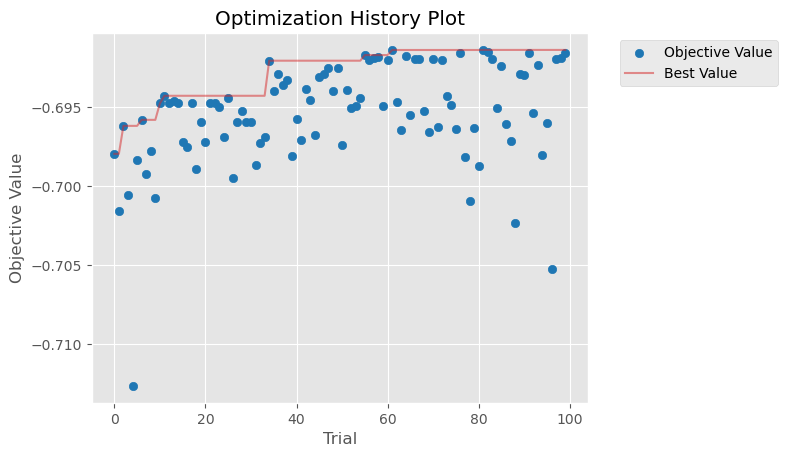

In [198]:
# optimization history plot
optuna.visualization.matplotlib.plot_optimization_history(study)

<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

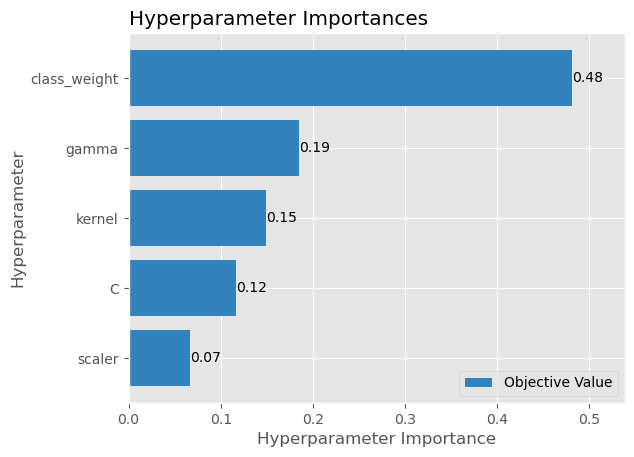

In [199]:
# plot param importances
optuna.visualization.matplotlib.plot_param_importances(study)

array([<Axes: xlabel='C', ylabel='Objective Value'>,
       <Axes: xlabel='class_weight'>, <Axes: xlabel='gamma'>,
       <Axes: xlabel='kernel'>, <Axes: xlabel='scaler'>], dtype=object)

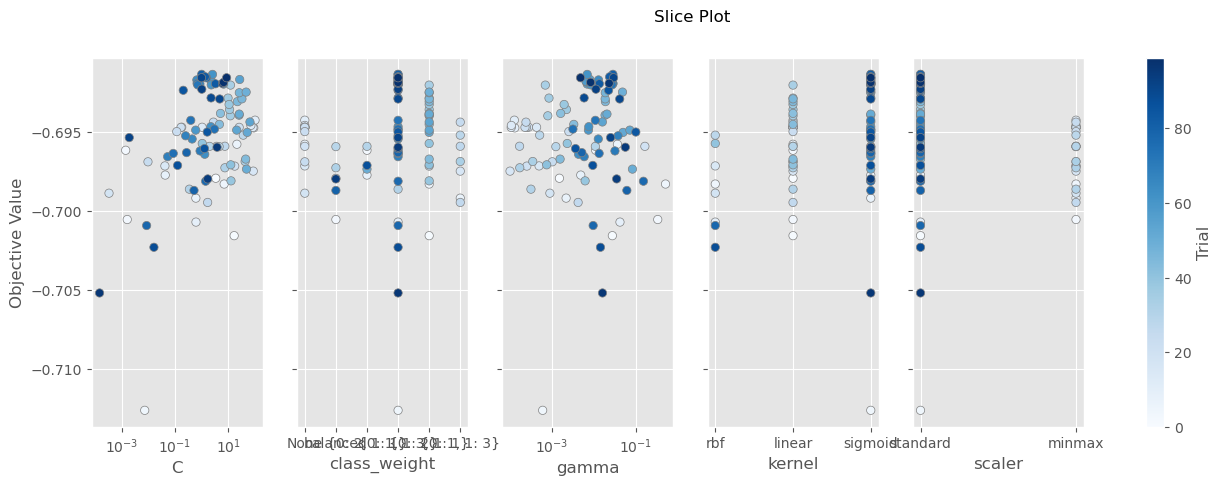

In [200]:
# plot negative log-loss for each hyper-parameter trial (100 dots)
optuna.visualization.matplotlib.plot_slice(study)

[W 2024-05-29 20:03:44,440] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


array([[<Axes: ylabel='C'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='class_weight'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='gamma'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='kernel'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: xlabel='C', ylabel='scaler'>,
        <Axes: xlabel='class_weight'>, <Axes: xlabel='gamma'>,
        <Axes: xlabel='kernel'>, <Axes: xlabel='scaler'>]], dtype=object)

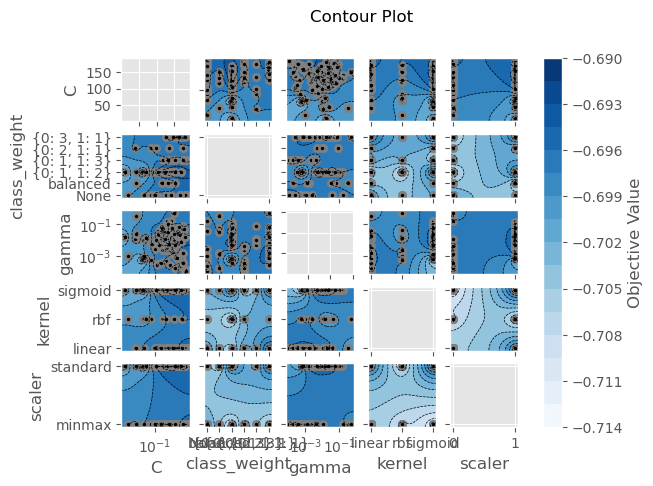

In [201]:
optuna.visualization.matplotlib.plot_contour(study)

### ---------- The Best Model Post-Tuning ----------

Let us now compare our tuned model with our base model.

In [202]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=0.9984435834816894, class_weight={0: 1, 1: 2},
                     gamma=0.028434930159725435, kernel='sigmoid',
                     probability=True, random_state=42))])

In [203]:
base_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(gamma=0.1, random_state=42))])

In [204]:
best_model.fit(X_train_selected, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=0.9984435834816894, class_weight={0: 1, 1: 2},
                     gamma=0.028434930159725435, kernel='sigmoid',
                     probability=True, random_state=42))])

In [205]:
def analyze_model(model, X_train, X_test, y_train, y_test, generate_plots=0):
    # predict y on the test data
    y_pred = model.predict(X_test)

    # evaluate model accuracy
    accuracy_train = accuracy_score(y_train, model.predict(X_train))
    accuarcy_test = accuracy_score(y_test, y_pred)
    print(f"Train Accuracy: {accuracy_train:0.4}, Test Accuracy: {accuarcy_test:0.4}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    if generate_plots:
        print("Confusion Matrix:")
        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
        plt.title("Confusion matrix")
        plt.show()

        # Display ROC Curve
        RocCurveDisplay.from_estimator(model, X_test, y_test, name="Baseline Model")
        plt.title("AUC-ROC Curve")
        plt.plot([0, 1], [0, 1], linestyle="--", label="Random 50:50")
        plt.legend()
        plt.show()

Let us first analyze the original *base model* again and print its report.

Train Accuracy: 0.5956, Test Accuracy: 0.5629
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.14      0.21       132
           1       0.59      0.86      0.70       186

    accuracy                           0.56       318
   macro avg       0.50      0.50      0.46       318
weighted avg       0.52      0.56      0.50       318

Confusion Matrix:


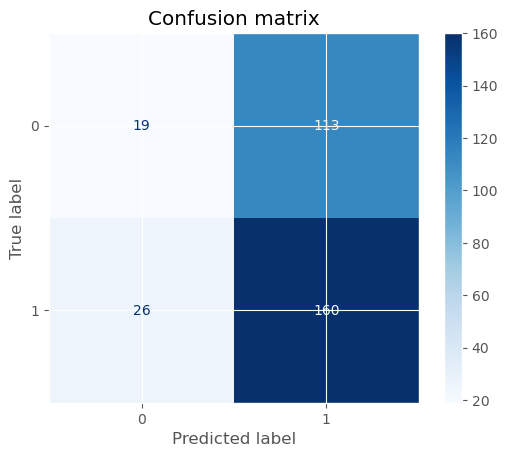

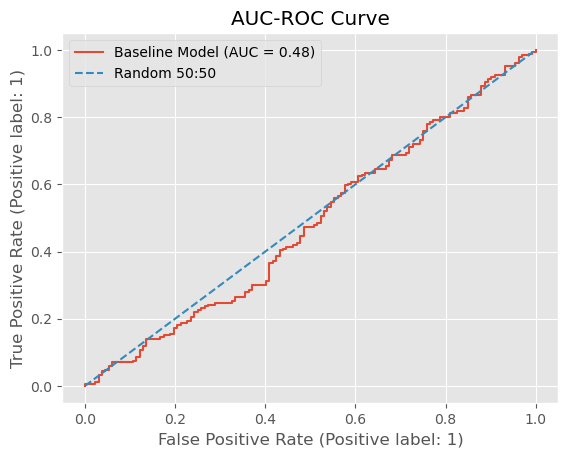

In [206]:
analyze_model(base_model, X_train_selected, X_test_selected, y_train, y_test, generate_plots=1)

The tuned model (best model after the hyper-parameter tuning) performs as follows:

Train Accuracy: 0.5437, Test Accuracy: 0.5975
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.06       132
           1       0.59      1.00      0.74       186

    accuracy                           0.60       318
   macro avg       0.80      0.52      0.40       318
weighted avg       0.76      0.60      0.46       318

Confusion Matrix:


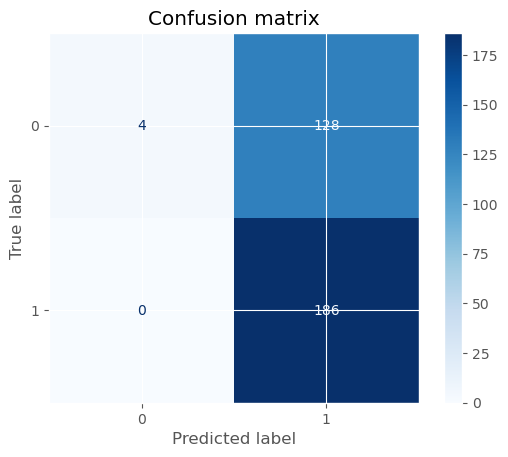

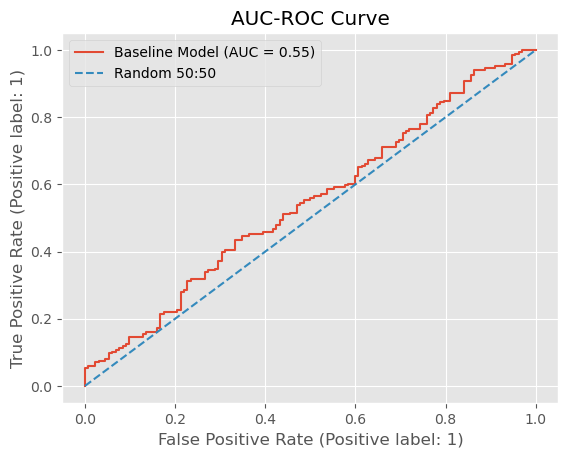

In [207]:
analyze_model(best_model, X_train_selected, X_test_selected, y_train, y_test, generate_plots=1)

#### Conclusion
Both model accuarcys are comparable at 60% (training data) and 56% (test data) for the original model and 54% (training data) and 60% (test data) for the tuned model. While they both predict correctly in more than half of our cases, their accuracy is still in the range of a random guessing algorithm (AUC = 0.50) although the tuned model at least consistently slightly outperforms the 50:50 random approach as can be seen in the ROC curve.

Since the original model already struggled with identifying the minority class correctly, we put an emphasis on tuning the class weights. However, the classification reports, confusion matrices and ROC curves indicate that the class imbalance is still problematic. In fact, in the tuned model, despite hyper-parameter optimization, the model's performance to distinguish the classes worsens considering recall and F1 score of the tuned model decreases further for class 0 in the classification report.

We conclude that the model predictor's performance is not very good, most probably because of class imbalance. Both models are biased towards class 1 (positive trend) while struggling to correctly identify class 0 (negative trend).

**How could the model be improved potentially?**
- Since the class weights did not sufficiently correct the class imbalance in our tuned model, one could play around with using another loss function like F1-score more targeted for imbalanced datasets or integrate SMOTE (Synthetic Minority Oversampling Technique, [12]). The latter method can help tackle class imbalance by generating synthetic samples for the minority class 0. This can provide the model with a more balanced dataset, improving its ability to correctly identify instances of both classes.
- Feature engineering could be improved, finding and adding more significant features for the trend prediction.
- Feature selection could be improved by employing more or other selection methods.
- Model selection from SVM could potentially be improved for another model that is more suitable for our data.
- Cross-validate more extensively to ensure the model does not overfit.
- Hyper-parameter tuning could potentially be enhanced by exploring a wider range of hyper-parameters, different hyperparameter optimization techniques, or more extensive value ranges for the existing hyper-parameters.


We will try the first suggested improvement now using F1 scores [13] which both models previously struggled with (low F1 scores for class 0). This metric is a harmonic mean of the precision and recall and it takes into account. Therefore, it puts more of an emphasis on the minority class and can yield a more balanced evaluation of all classes.

In [208]:
from sklearn.metrics import f1_score


def define_hyperparameters(trial):
    # Define hyper-parameter space
    scaler_name = trial.suggest_categorical('scaler', ["standard", "minmax"])
    C = trial.suggest_loguniform("C", 0.0001, 100.0)
    gamma = trial.suggest_loguniform("gamma", 0.0001, 1.0)
    kernel = trial.suggest_categorical("kernel", ["rbf", "linear", "sigmoid"])
    class_weight_str = trial.suggest_categorical("class_weight",
                                                 [str(option) for option in class_weight_options])
    return {"scaler_name": scaler_name,
            "C": C,
            "gamma": gamma,
            "kernel": kernel,
            "class_weight_str": class_weight_str}


def objective(trial, X, y):
    # Get tunable hyperparameters + pipeline
    hps = define_hyperparameters(trial)

    # Create model as Pipeline
    scaler = StandardScaler() if hps["scaler_name"] == "standard" else MinMaxScaler()
    model = Pipeline([
        ("scaler", scaler),
        ("svm", SVC(C=hps["C"],
                    gamma=hps["gamma"],
                    kernel=hps["kernel"],
                    class_weight=class_weight_mapping[hps["class_weight_str"]],
                    probability=True, random_state=42))
    ])

    # Define TimeSeriesSplit for cross-validation
    tscv = TimeSeriesSplit(n_splits=5)

    # Use F1-score function now instead of log-loss like before
    f1_scores = []
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        f1_scores.append(f1_score(y_test, preds, average='weighted'))

    # Return the mean F1-score for optimization
    return np.mean(f1_scores)


def optimize_hyperparameters(X_train, y_train, n_trials=100):
    # Convert pandas objects to numpy arrays
    X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
    y_train = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train

    # Study setup
    study = optuna.create_study(direction='maximize')

    # Optimization
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=n_trials)
    best_params = study.best_trial.params

    # Convert the best class_weight parameter back to dictionary
    best_params['class_weight'] = class_weight_mapping[best_params['class_weight']]

    # Create best pipeline
    scaler = StandardScaler() if best_params['scaler'] == 'standard' else MinMaxScaler()
    best_model = Pipeline([
        ('scaler', scaler),
        ('svm', SVC(C=best_params['C'],
                    gamma=best_params['gamma'],
                    kernel=best_params['kernel'],
                    class_weight=best_params['class_weight'],
                    probability=True,
                    random_state=42))
    ])
    return best_model, best_params, study

In [215]:
best_model, best_params, study = optimize_hyperparameters(X_train_selected, y_train, n_trials=100)

[I 2024-05-29 20:25:31,434] A new study created in memory with name: no-name-546143ab-a8b1-41fa-bbc2-5d72bfda52ad
[I 2024-05-29 20:25:32,684] Trial 0 finished with value: 0.37658382058272516 and parameters: {'scaler': 'standard', 'C': 24.63720720044494, 'gamma': 0.00010715511506679921, 'kernel': 'sigmoid', 'class_weight': 'None'}. Best is trial 0 with value: 0.37658382058272516.
[I 2024-05-29 20:25:33,372] Trial 1 finished with value: 0.37658382058272516 and parameters: {'scaler': 'standard', 'C': 0.0016008268354628275, 'gamma': 0.9525893465999562, 'kernel': 'linear', 'class_weight': 'None'}. Best is trial 0 with value: 0.37658382058272516.
[I 2024-05-29 20:25:34,034] Trial 2 finished with value: 0.37658382058272516 and parameters: {'scaler': 'standard', 'C': 0.3778348964321284, 'gamma': 0.00023905159358358297, 'kernel': 'linear', 'class_weight': '{0: 1, 1: 2}'}. Best is trial 0 with value: 0.37658382058272516.
[I 2024-05-29 20:25:34,893] Trial 3 finished with value: 0.2935716706216069

[I 2024-05-29 20:26:15,147] Trial 31 finished with value: 0.49710515057890914 and parameters: {'scaler': 'minmax', 'C': 4.228293314244182, 'gamma': 0.06129098494507601, 'kernel': 'linear', 'class_weight': 'balanced'}. Best is trial 22 with value: 0.5131894683784187.
[I 2024-05-29 20:26:15,892] Trial 32 finished with value: 0.5078558173923933 and parameters: {'scaler': 'minmax', 'C': 1.5454176587291386, 'gamma': 0.07890041034351278, 'kernel': 'linear', 'class_weight': 'balanced'}. Best is trial 22 with value: 0.5131894683784187.
[I 2024-05-29 20:26:16,864] Trial 33 finished with value: 0.5059539939879011 and parameters: {'scaler': 'minmax', 'C': 1.588031382020889, 'gamma': 0.03266153098819896, 'kernel': 'linear', 'class_weight': 'balanced'}. Best is trial 22 with value: 0.5131894683784187.
[I 2024-05-29 20:26:17,430] Trial 34 finished with value: 0.37658382058272516 and parameters: {'scaler': 'minmax', 'C': 1.003773168678343, 'gamma': 0.02573211329568204, 'kernel': 'linear', 'class_weig

[I 2024-05-29 20:26:42,634] Trial 62 finished with value: 0.510576263496513 and parameters: {'scaler': 'minmax', 'C': 1.3848865741835206, 'gamma': 0.07887480149214937, 'kernel': 'linear', 'class_weight': 'balanced'}. Best is trial 44 with value: 0.5135282892592586.
[I 2024-05-29 20:26:43,488] Trial 63 finished with value: 0.5054420469038338 and parameters: {'scaler': 'minmax', 'C': 1.0033152800951946, 'gamma': 0.07806938661685438, 'kernel': 'linear', 'class_weight': 'balanced'}. Best is trial 44 with value: 0.5135282892592586.
[I 2024-05-29 20:26:44,206] Trial 64 finished with value: 0.5052495905087702 and parameters: {'scaler': 'minmax', 'C': 0.6646279565523792, 'gamma': 0.045882104309769134, 'kernel': 'linear', 'class_weight': 'balanced'}. Best is trial 44 with value: 0.5135282892592586.
[I 2024-05-29 20:26:45,460] Trial 65 finished with value: 0.33452071192609845 and parameters: {'scaler': 'minmax', 'C': 0.2589983690074204, 'gamma': 0.09971788530009154, 'kernel': 'rbf', 'class_weigh

[I 2024-05-29 20:27:09,575] Trial 93 finished with value: 0.5019370825672683 and parameters: {'scaler': 'minmax', 'C': 0.7657516670832563, 'gamma': 0.9088609208113313, 'kernel': 'linear', 'class_weight': 'balanced'}. Best is trial 44 with value: 0.5135282892592586.
[I 2024-05-29 20:27:10,349] Trial 94 finished with value: 0.4372771855719345 and parameters: {'scaler': 'minmax', 'C': 0.17004025437318462, 'gamma': 0.5972111119102896, 'kernel': 'linear', 'class_weight': 'balanced'}. Best is trial 44 with value: 0.5135282892592586.
[I 2024-05-29 20:27:11,080] Trial 95 finished with value: 0.4858295674461394 and parameters: {'scaler': 'minmax', 'C': 0.26630630823751106, 'gamma': 0.8247750345445897, 'kernel': 'linear', 'class_weight': 'balanced'}. Best is trial 44 with value: 0.5135282892592586.
[I 2024-05-29 20:27:11,846] Trial 96 finished with value: 0.5097651732106012 and parameters: {'scaler': 'minmax', 'C': 0.5670756083469255, 'gamma': 0.41577963678525776, 'kernel': 'linear', 'class_weig

In [216]:
best_params

{'scaler': 'minmax',
 'C': 0.43446665597435075,
 'gamma': 0.4654838463165922,
 'kernel': 'linear',
 'class_weight': 'balanced'}

In [217]:
best_model.fit(X_train_selected, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svm',
                 SVC(C=0.43446665597435075, class_weight='balanced',
                     gamma=0.4654838463165922, kernel='linear',
                     probability=True, random_state=42))])

Train Accuracy: 0.5366, Test Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.35      0.37       132
           1       0.57      0.61      0.59       186

    accuracy                           0.50       318
   macro avg       0.48      0.48      0.48       318
weighted avg       0.49      0.50      0.50       318

Confusion Matrix:


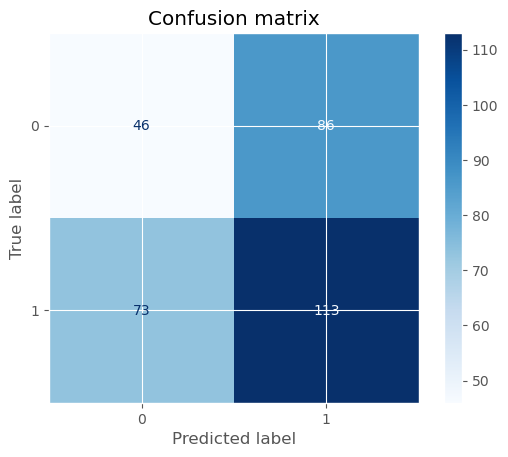

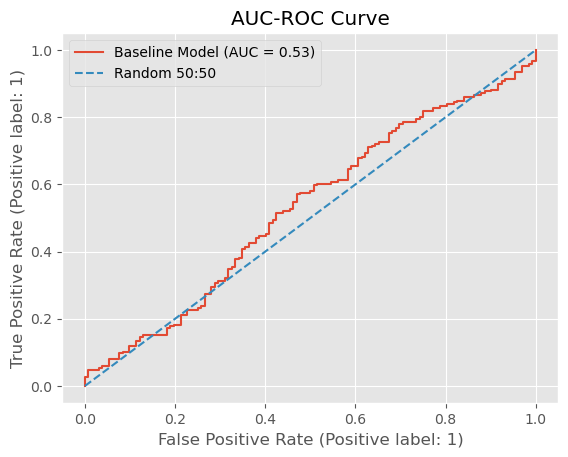

In [218]:
analyze_model(best_model, X_train_selected, X_test_selected, y_train, y_test, generate_plots=1)

#### Conclusion

We now compare the two optimization approaches:
1. Using log-loss minimization
2. Using F1 score maximization


*Overall accuracy:*

The slightly higher AUC score of the log-loss implementation of 55% slightly outperforms the F1 implementation standing at an AUC score of 53%. However, models are not extremely accurate. At 55% & 60% (train & test accuracy), the log-loss minimization approach also performs more accurately in number of estimates compared to the F1-score maximizing approach at 54% & 50% (train & test accuracy).

*Class imbalance tackling*:
* Class 0 performance: The second approach performs significantly better at identifying class 0 with higher recall 0.35 and F1 score 0.37 compared to the log-loss approach (recall 0.03, F1 score 0.06).
* Class 1 performance: The log-loss displayed marginally better precision at 59% than the F1 score approach at 57%, but this came at the cost of identifying almost all instances as class 1. The F1-score optimized model has a more balanced precision and recall for class 1.
* $\Rightarrow$ Overall: The higher macro and weighted Avg F1 scores of the second implementation indicate that the approach using F1 score maximization yields a more balanced performance across both classes.


Considering that our data set was already biased towards class 1, I think it makes sense to consider a more balanced model using F1 score maximization, despite the overall accuracy being slightly inferior compared to the log-loss model. The log-loss model almost never identifies class 0 instances correctly which could be very risky, if this predictor was used in a real-world investment strategy, since the model would almost always predict an upward trend and the investor would almost always increase their position.

## References

* [1]: JA244.5: Lecture Notes on *Supervised Learning II* by Kannan Singaravelu, CQF Faculty
* [2]: JA24P10: CQF Python Labs on *Trend Prediction Using Logistic Regression* by Kannan Singaravelu
* [3]: JA244.6: Lecture Notes on *Decision Trees & Ensemble Models* by Dr. Panos Parpas, CQF Associate Faculty
* [4]: JA24P11: CQF Python Labs on *Gradient Boosting for Price Prediction* by Kannan Singaravelu
* [5]: JA244.4: Lecture Notes on *Supervised Learning I* by Kannan Singaravelu, CQF Faculty
* [6]: JA244.4: Solutions on *Supervised Learning I* by Kannan Singaravelu, CQF Faculty
* [7]: JA242.4: Lecture Notes on *Asset Returns: Key Imperial Stylized Facts* by Prof. Stephen Taylor, CQF Associate Faculty
* [8]: [`sklearn.feature_selection.SelectKBest` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html): retrieved on 2024-05-24
* [9]: [`sklearn.ensemble.RandomForestClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): retrieved on 2024-05-25
* [10]: JA244.1 & 2: Lecture Notes on *An Introduction to Machine Learning I & II*, "Intro to ML - 7 - SVM" by Dr. Paul Wilmott, CQF Associate Faculty, CQF Founder
* [11]: [`sklearn` User Guide for Supervised learning](https://scikit-learn.org/stable/modules/svm.html): retrieved on 2024-05-28
* [12]: Batuwita, R., & Palade, V. (2013). Class imbalance learning methods for support vector machines. In *Imbalanced Learning* (pp. 83-99). DOI:10.1002/9781118646106.ch5
* [13]: [`sklearn.metrics.f1_score` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html): retrieved on 2024-05-29